In [1]:
## import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report


In [2]:
## load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_data = pd.read_csv('gender_submission.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
## Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
## Check for missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
## Replace missing values with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [11]:
## Replace missing values with median
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [12]:
## Replace missing values with median
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [13]:
# Calculate the mode of the Cabin variable
mode = train_data['Cabin'].mode().values[0]
# Replace missing values in Cabin variable with mode
train_data['Cabin'].fillna(mode, inplace=True)


In [14]:
# Calculate the mode of the Cabin variable
mode = test_data['Cabin'].mode().values[0]
# Replace missing values in Cabin variable with mode
test_data['Cabin'].fillna(mode, inplace=True)

In [15]:
# Calculate the mode of the Embarked variable
mode = train_data['Embarked'].mode().values[0]
# Replace missing values in Embarked variable with mode
train_data['Embarked'].fillna(mode, inplace=True)

In [16]:
## Check for missing values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
## statistical summery of the dataset 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
## Exploratory data analysis
## correlation matrix
corr_mat = train_data.corr(numeric_only=True)
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

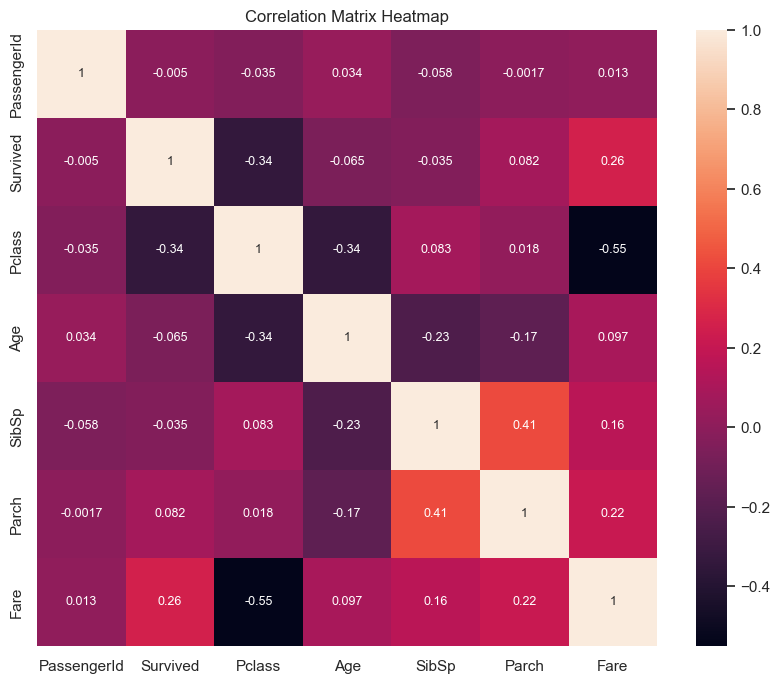

In [423]:
## plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, annot_kws={'size': 9})
plt.title("Correlation Matrix Heatmap", loc="center")

In [424]:
# Create age groups
bins = [0, 15, 30, 45, 60, 100]
labels = ["Children", "Young", "Mid-Aged", "Senior-Adult", 'Elderly']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels)

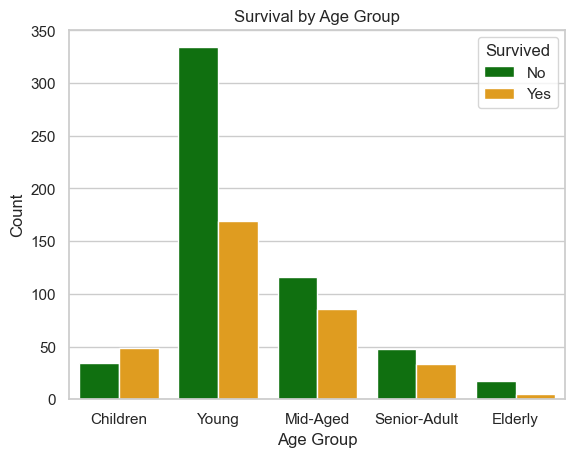

In [425]:
# Create the count plot
sns.countplot(data=train_data, x='AgeGroup', hue='Survived')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival by Age Group')
plt.legend(title='Survived', labels=['No', 'Yes'])


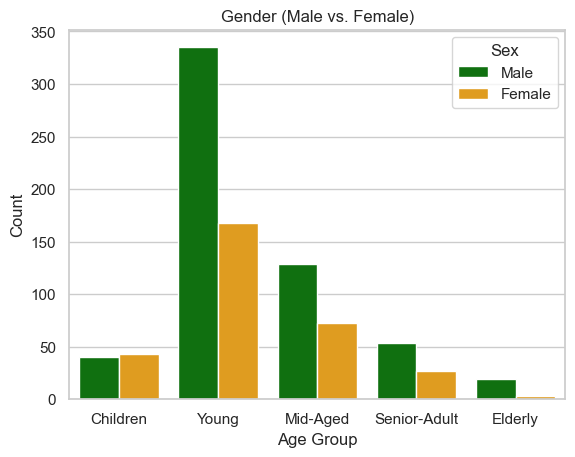

In [426]:
# Define your custom color palette
custom_palette = ['green', 'orange']

# Create the count plot with the custom color palette
sns.set_palette(custom_palette)

# Create the count plot
sns.countplot(data=train_data, x='AgeGroup', hue='Sex', dodge=True)

# Customize the plot (optional)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Gender (Male vs. Female)')
plt.legend(title='Sex', labels=['Male', 'Female'])


Text(0.5, 0.98, 'Survival by Passenger Class and Gender')

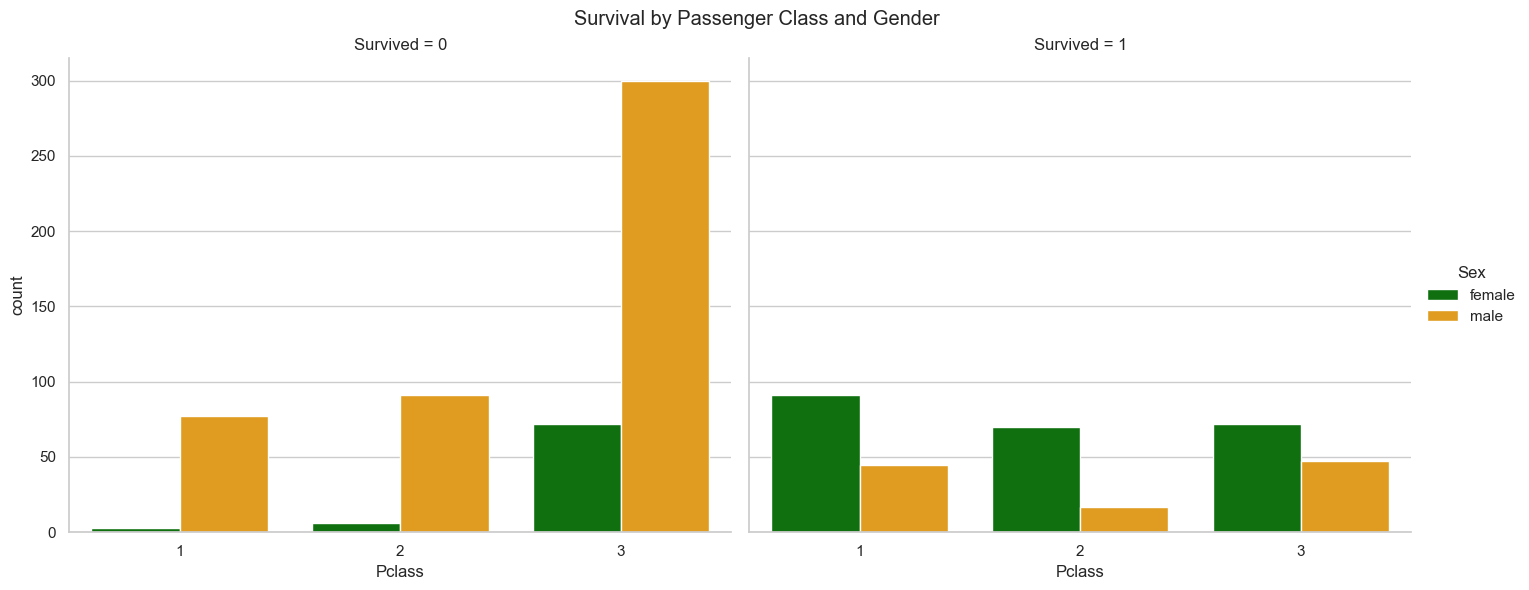

In [427]:
# Define your custom color palette
custom_palette = ['green', 'orange']
# Create the count plot with the custom color palette
sns.set_palette(custom_palette)
sns.catplot(data=train_data, x='Pclass', hue='Sex', col='Survived', kind='count', height=6, aspect=1.2)
# Customize the plot
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival by Passenger Class and Gender')


In [428]:
## Survived rate for women
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100
print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [429]:
## Survived rate for men
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)*100
print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


<Axes: xlabel='Survived', ylabel='count'>

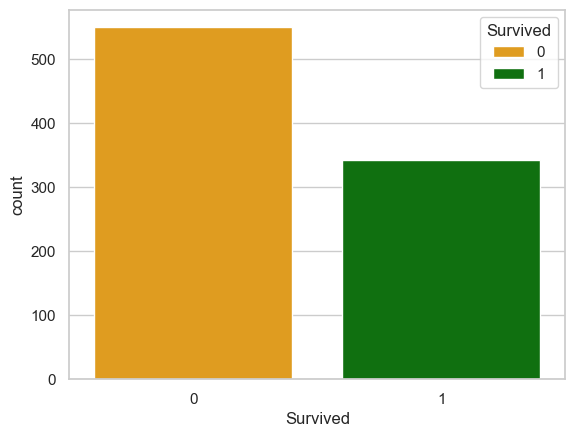

In [430]:
# plotting 'Survived' column in train_data
sns.countplot(x ='Survived', hue='Survived', data=train_data, palette={0: 'orange', 1: 'green'})

<Axes: xlabel='Sex', ylabel='count'>

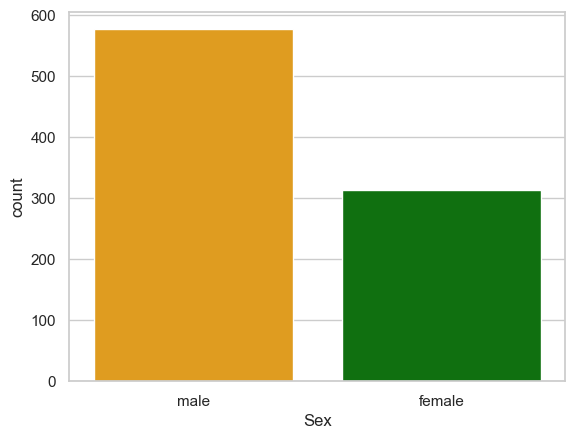

In [431]:
# plotting ratio of genders in train_data
sns.countplot(data=train_data, x='Sex', hue='Sex', palette={"male": "orange", "female": "green"}, legend=False)

<Axes: xlabel='Sex', ylabel='count'>

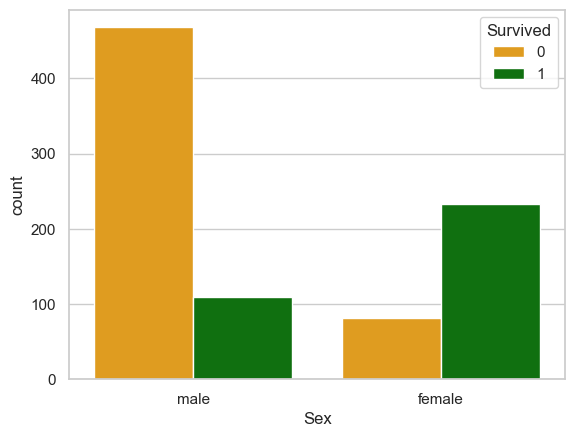

In [432]:
# Create a countplot for the 'Survived' column in train_data
sns.countplot(x ='Sex', hue='Survived', data=train_data, palette={0: 'orange', 1: 'green'})

<Axes: xlabel='Pclass', ylabel='count'>

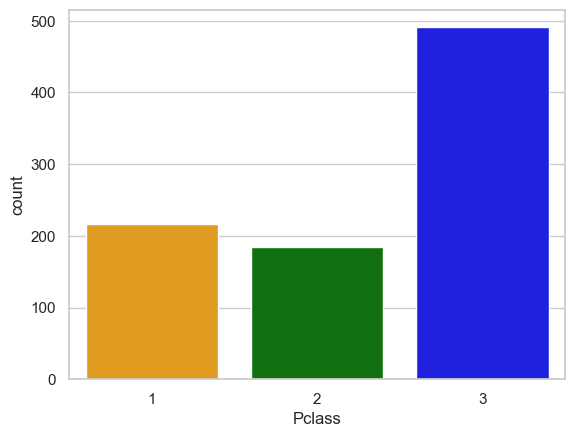

In [433]:
#plotting different types of classes 
sns.countplot(data=train_data, x='Pclass', hue='Pclass', palette={1: 'orange', 2: 'green', 3: 'blue'}, legend=False)

<Axes: xlabel='Pclass', ylabel='count'>

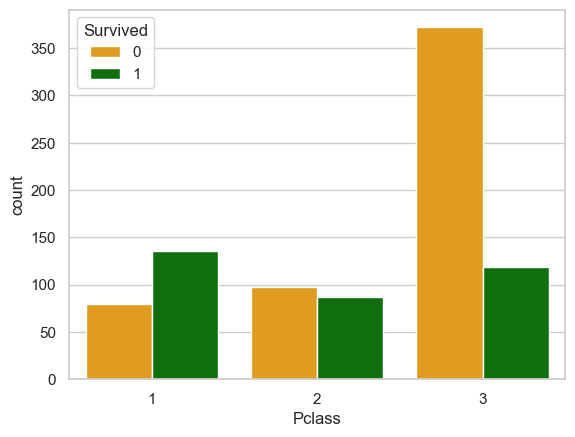

In [434]:
sns.countplot(data = train_data , x = 'Pclass', hue = 'Survived', palette={0: 'orange', 1: 'green'})

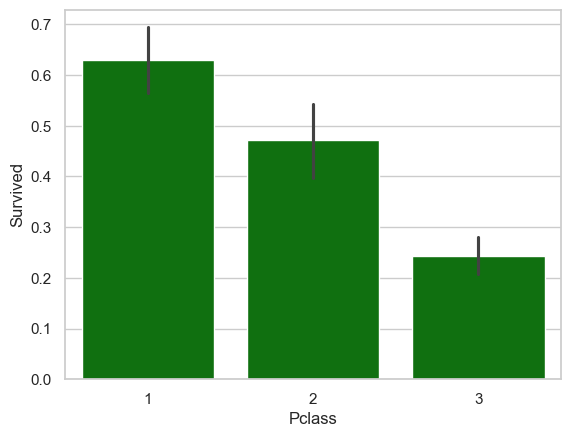

In [435]:
# Use the correct parameters for 'x' and 'y' and specify data as 'train_data'
sns.barplot(x='Pclass', y='Survived', data=train_data, color="green")

plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

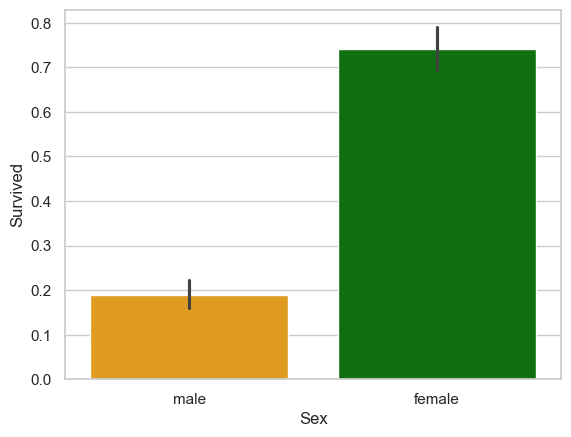

In [436]:
# Create a palette dictionary with colors for 'male' and 'female'
palette = {'male': 'orange', 'female': 'green'}

# Create a barplot with 'Sex' on the x-axis, 'Survived' on the y-axis, and separate bars by 'Sex'
sns.barplot(x='Sex', y='Survived', data=train_data, hue='Sex', palette=palette)

<Axes: xlabel='Age', ylabel='Count'>

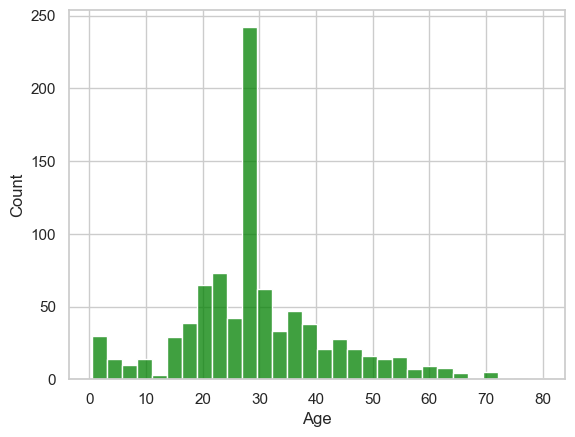

In [437]:
#ploting distribution of age 
sns.histplot(data = train_data , x = 'Age')

<function matplotlib.pyplot.show(close=None, block=None)>

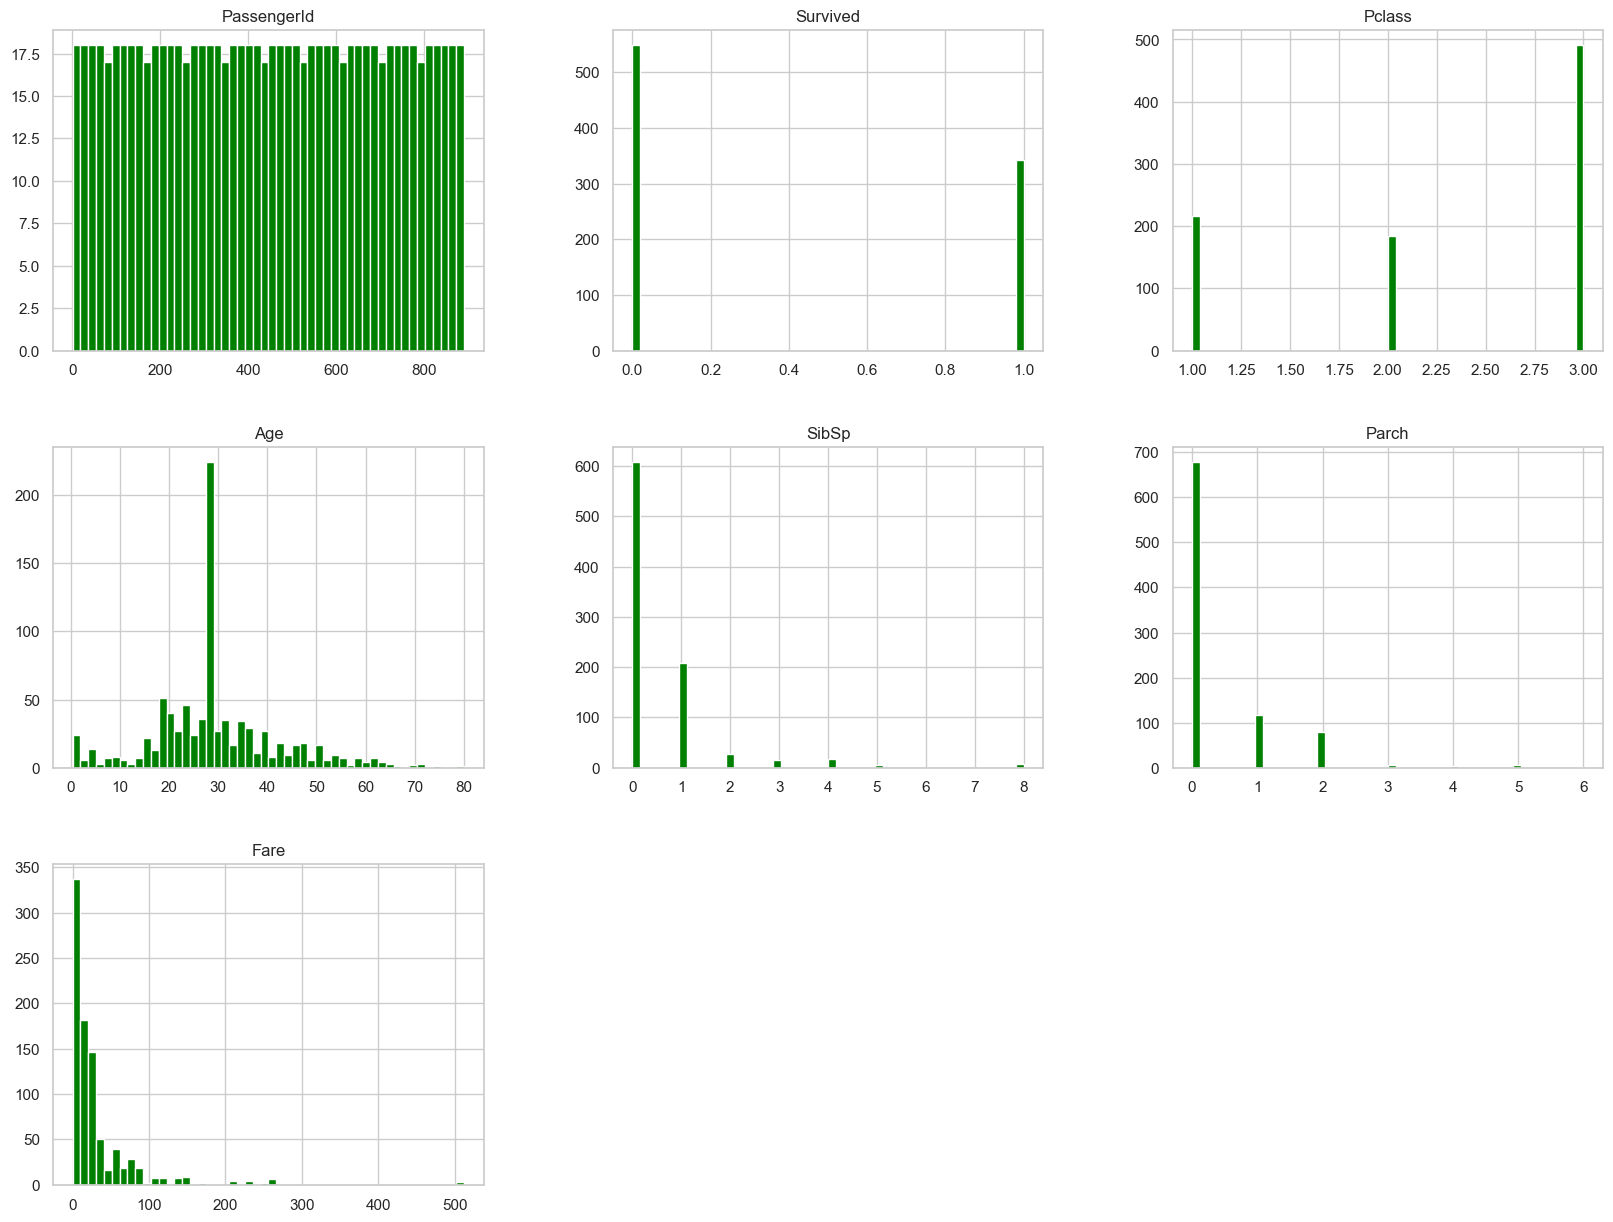

In [438]:
## Histrogram plot to see the relationship
train_data.hist(bins=50, figsize=(20, 15))
plt.show


In [439]:
## Data Preprocessing

In [19]:
## insert the survived column in the test data
test_data.insert(1,'Survived',gender_data['Survived'])

In [20]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [21]:
train_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [22]:
##use label encoder for categorical columns
label_encoder = preprocessing.LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])


In [23]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [24]:
X_train = train_data.drop('Survived',axis='columns')
y_train = train_data['Survived']

In [25]:
X_train

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,28.0,23.4500
889,1,1,26.0,30.0000


In [26]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
test_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [28]:
##use label encoder for categorical columns
label_encoder = preprocessing.LabelEncoder()
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])

In [29]:
X_test = test_data.drop('Survived',axis='columns')
y_test = test_data['Survived']

In [30]:
## create our naive bayes model
gausian_model = GaussianNB()
## using  training data for fitting
gausian_model.fit(X_train, y_train)

GaussianNB()

In [31]:
## using test data to make prediction
y_pred = gausian_model.predict(X_test)

In [32]:
## create a dataframe with the prediction
pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [33]:
## model evaluation
## measuring accuracy comparing prediction and real survive
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))

Accurancy: 0.9497607655502392


In [34]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[245,  21],
       [  0, 152]], dtype=int64)

In [35]:
##standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 

In [36]:
##knn
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred_knn = knn_model.predict(X_test)

In [38]:
print('Accurancy:', metrics.accuracy_score(y_test,y_pred_knn))

Accurancy: 0.7535885167464115


In [39]:
pd.DataFrame({'Actual':y_test, 'predicted':y_pred_knn})

,Actual,predicted
0,0,0
1,1,0
2,0,0
3,0,1
4,1,0
...,...,...
413,0,1
414,1,1
415,0,0
416,0,1


In [40]:
## decision tree
## create a decision tree with criterion gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## entropy criterion with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy')

## max depth of 3
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [41]:
## fit our model
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)
decision_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
## make prediction

y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)

In [43]:
## model evaluation
print('Accurancy(gini):', metrics.accuracy_score(y_test,y_pred_gini))
print('Accurancy(entropy):', metrics.accuracy_score(y_test,y_pred_entropy))
print('Accurancy(depth):', metrics.accuracy_score(y_test,y_pred_depth))

Accurancy(gini): 0.7870813397129187
Accurancy(entropy): 0.7416267942583732
Accurancy(depth): 0.9760765550239234


In [44]:
## support vector machine
clfLinear = svm.SVC(kernel ='linear')
clfsigmoid = svm.SVC(kernel ='sigmoid')
clfrbf = svm.SVC(kernel ='rbf')

In [45]:
## fit the model
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [46]:
## make the prediction 
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [47]:
## model evaluation
print('Accurancy(Linear Kernel):', metrics.accuracy_score(y_test,y_pred_linear))
print('Accurancy(Sigmoid Kernel):', metrics.accuracy_score(y_test,y_pred_sigmoid))
print('Accurancy(RBF Kernel):', metrics.accuracy_score(y_test,y_pred_rbf))

Accurancy(Linear Kernel): 1.0
Accurancy(Sigmoid Kernel): 0.7440191387559809
Accurancy(RBF Kernel): 0.9688995215311005


In [48]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       266
           1       0.65      0.66      0.65       152

    accuracy                           0.74       418
   macro avg       0.72      0.73      0.72       418
weighted avg       0.75      0.74      0.74       418

